# Build and Train Linear Regression Network

In [90]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

## Step 0: Prepare Data

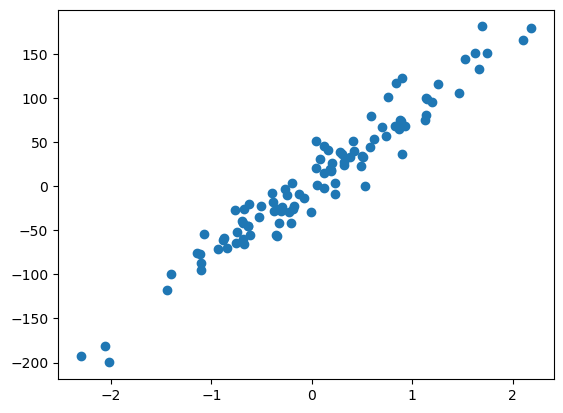

In [91]:
X_np, Y_np = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
plt.scatter(X_np, Y_np)
plt.show()

In [92]:
print(X_np.dtype)

float64


Need to convert to pytorch tensor and use float32

Important : Unsqueeze to match dimensions

In [93]:
X = torch.from_numpy(X_np.astype(np.float32))
Y = torch.from_numpy(Y_np.astype(np.float32)).unsqueeze(-1)

print("X shape :", X.shape)
print("Y shape :", Y.shape )

X shape : torch.Size([100, 1])
Y shape : torch.Size([100, 1])


In [94]:
n_samples, n_features = X.shape

print("Number of samples : ", n_samples)
print("Number of features : ", n_features)

Number of samples :  100
Number of features :  1


## Step 1: Build Model

Model will have only one Linear layer

In [95]:
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

## Step 2: Loss and Optimizer

In [96]:
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Step 3: Training Loop

In [97]:
num_epochs = 100

for epoch in range(num_epochs):

    # forward pass
    y_predict = model(X)
    loss = criterion(y_predict, Y)

    # backward pass
    loss.backward()

    # update
    optimizer.step()
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f"epoch = {epoch+1}, loss = {loss.item():.4f}")

epoch = 10, loss = 4418.1270
epoch = 20, loss = 3293.7024
epoch = 30, loss = 2480.7620
epoch = 40, loss = 1892.3584
epoch = 50, loss = 1466.0300
epoch = 60, loss = 1156.8352
epoch = 70, loss = 932.3912
epoch = 80, loss = 769.3338
epoch = 90, loss = 650.7838
epoch = 100, loss = 564.5327


Plot predicted values

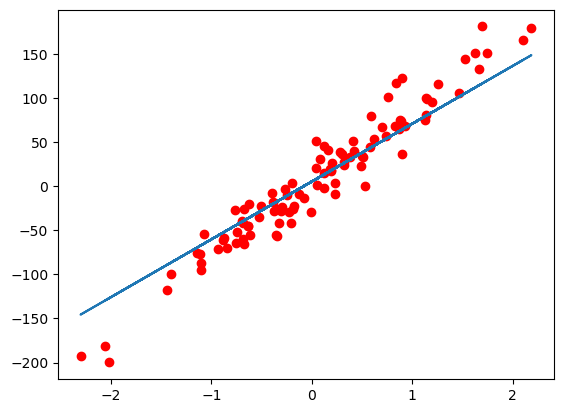

In [98]:
predict = model(X).detach().numpy()
plt.plot(X_np, Y_np, 'ro')
plt.plot(X_np, predict)
plt.show()